# Iris Plants dataset

This is a very common dataset used in Machine Learning, and it is readily available in sklearn library.

It is the Iris database, first used by Sir R.A. Fisher. It is widely used for pattern recognition.


## Objective
1) To attempt to see if it is possible to gleam any further information from the data to determine correlation between parameters and target flower classification, and if there are any patterns in data.
<br>2) To attempt to get the best accuracy score using various supervised learning machine learning algorithms.

## To do list
Below would be my train of thought of the things need to be done in order to process the dataset and to get the algorithm to predict. I will be using it as a task list to check off items done as well.

- understand the database and the parameters [done]
- any missing/blank values in the dataset? [done]
- check data information & distribution of data [done]
- account for any outliers? [done]
- any correlation so that can drop off data? [done]
- Hypothesis Testing if any? [done]
- train / validation / test dataset split? [done]
- Feature Scaling [done]
- ratio of targets? is it sufficient? Does it require upsampling/downsampling? [done]
- PCA decomposition required? [done]
- various Algorithms to be used [done]
- need to build pipeline? [done]
- predict accuracy and Confusion metrics [done]
- ROC & AUC [done]
- conclusion [done]

In [1]:
# Import libraries which will be used.

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from scipy import stats

from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
# Load Iris Dataset into pandas Dataframe

X, Y = load_iris(return_X_y=True)

df = pd.DataFrame(X, columns=('sepal length','sepal width','petal length','petal width'))
df.insert(4, 'Class', Y)
df.head()

,sepal length,sepal width,petal length,petal width,Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Understanding parameters

Below are some of the definitions of sepal and petal that I got from searching the Internet.
<br>
<br>Sepal: each of the parts of the calyx of a flower, enclosing the petals and typically green and leaflike. At the back of the petals
<br>Petal: each of the segments of the corolla of a flower, which are modified leaves and are typically coloured.

# Exploratory Data Analysis

### Check missing values

In [3]:
# Check if there are any missing values in the dataset

df.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
Class           0
dtype: int64

From the above, there doesn't seem to be any missing value points.

### Check database information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   Class         150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [5]:
df.describe()

,sepal length,sepal width,petal length,petal width,Class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


From the above, it doesn't seem like there are any issues with any of the parameters having a 0 value.
<br> However, some parameters such as petal length and petal width are having a very large standard deviation. It would probably be good to scale the data later.

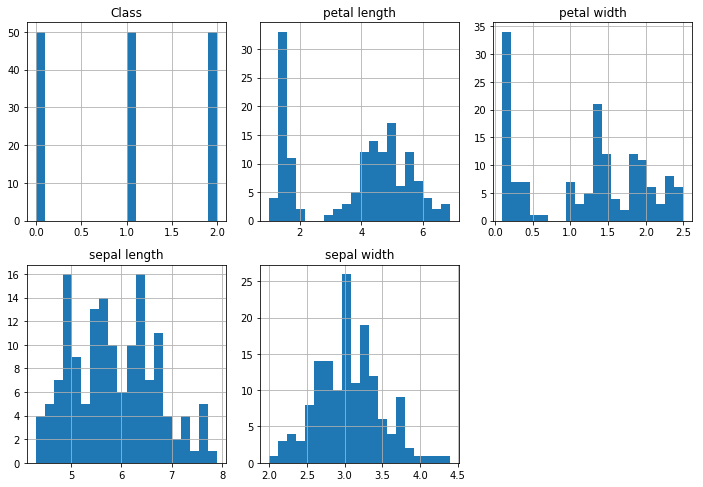

In [6]:
# Histogram plot of data

col = list(df.columns)
df[col].hist(stacked=True, bins=20, figsize=(10,10), layout=(3,3))
plt.tight_layout()

From the above histogram plot, there seems to be few outliers for each of the parameters with the exception of Class, with petal length and width seemingly positively skewed. Sepal width seems to be the only one which most resembles a normal distribution.

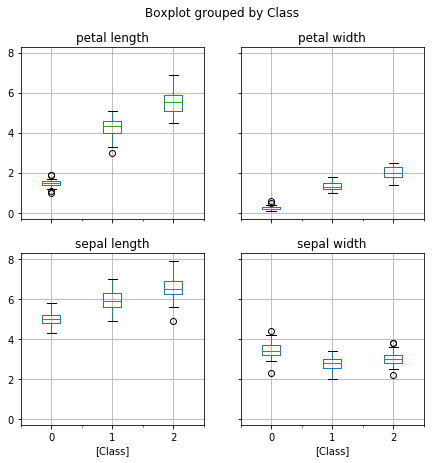

In [7]:
df.boxplot(by='Class', figsize=(7,7));

From the above boxplot, we can see that in general, Setosa has the smallest petal lengths and widths, while the variants of iris flowers have no discernable pattern for the sepal lengths and widths.
<br> This also confirms the histogram that there doesn't seem to have that many outliers, and most of the outliers are just slightly out of range of the quartiles.

### Account for outliers?

From the charts above, there doesn't seem to have that many outliers. So I believe it would be fine to leave the data as it is.

### Check Correlation of data

In [8]:
df.corr()

,sepal length,sepal width,petal length,petal width,Class
sepal length,1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length,0.871754,-0.428440,1.000000,0.962865,0.949035
petal width,0.817941,-0.366126,0.962865,1.000000,0.956547
Class,0.782561,-0.426658,0.949035,0.956547,1.000000


From the correlation table above, it is obvious that even though we have just 4 parameters, there is significant positive linear correlation between them. I would probably need to remove 1 or 2 parameters to avoid collinearity in the data points, and hopefully, this will result in better predictive powers.
<br> From the pairplot below, visually, I can see that there are emerging patterns between the parameters. There is a clear positive linear relationship between petal length and petal width. I would have to remove either one of them. For the sepal length and width, the range of values between the classes do not differ by significantly from the pairplot and confirmation from the boxplot.

Based on the different combinations possible and reviewing the charts, I have decided to pick one column each from sepal and petal, and hence I will drop columns sepal width and petal length from the data. Reason is because from the boxplot, there appears to be a better distinction between the classes  for sepal length than sepal width, and since sepal length is retained, and to reduce collinearity, petal width is retained instead of petal length due to the more linear relationship between sepal length and petal length from the pairplot.

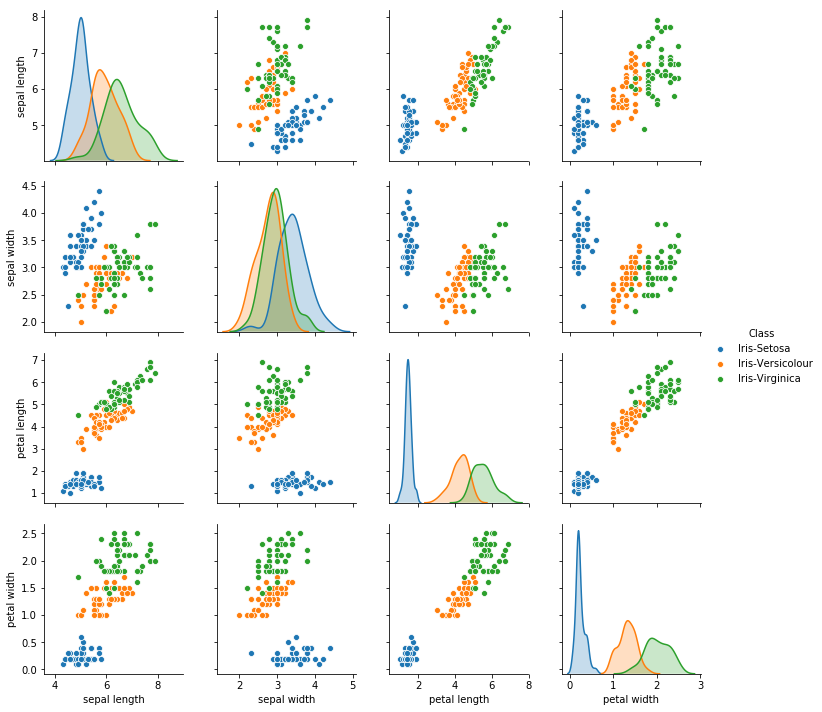

In [9]:
df_t = df.copy()

df_t['Class'].astype('category')
df_t['Class'].replace(0,"Iris-Setosa",inplace=True)
df_t['Class'].replace(1,"Iris-Versicolour",inplace=True)
df_t['Class'].replace(2,"Iris-Virginica",inplace=True)

sns.pairplot(df_t,hue='Class',diag_kind='kde');

### Hypothesis Testing

No hypothesis to be inferred due to the high linear correlation between the dataset parameters.

### Splitting of Dataset (Training/Validation/Testing)

Training Dataset: Dataset sample that is used to fit the model.
Validation Dataset: Dataset sample that is used for hypertuning the parameters, and comparing the accuracy and error rates of the model performance between using the training dataset and the validation dataset.
Testing Dataset: Dataset sample that is used to test the model performance (predictive power).

Since there is only 150 records in the dataset, I will only be splitting the data into Training and Testing, at a 70% / 30% ratio.

I will also be removing the columns sepal width and petal length from the dataset.

In [10]:
# Splitting the data set into training and test set

X = df.drop(['Class','sepal width','petal length'],axis=1)
Y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=2)

In [11]:
# Print the distribution of labels between the training and testing dataset

print("Ratio of classes in training dataset:")
print(round(y_train.value_counts() / len(y_train),4))
print()
print("Ratio of classes in testing dataset:")
print(round(y_test.value_counts() / len(y_train),4))

Ratio of classes in training dataset:
2    0.3524
1    0.3333
0    0.3143
Name: Class, dtype: float64

Ratio of classes in testing dataset:
0    0.1619
1    0.1429
2    0.1238
Name: Class, dtype: float64


Seems to be fairly evenly distributed between the training and testing dataset. Okay to proceed to the next step.

### Feature Scaling

In [12]:
# Scaling the x training and testing dataset
scaler = preprocessing.StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Imbalanced Dataset (Is there a need for Upsampling/Downsampling?)

In [13]:
df['Class'].value_counts()

2    50
1    50
0    50
Name: Class, dtype: int64

Since there is an equal number of labels for each of the classes, it is a balanced dataset and there is no need for upsampling/downsampling.

**PCA decomposition**
<br> Since there are so few features, I don't think it is necessary to perform any further decomposition and the sufficient parameters should suffice for predicting the target column.

## Perform Machine Learning Algorithms

I have selected quite a number of different machine learning algorithms to try and classify the Iris dataset. Wherever possible, I will hypertune the parameters using GridSearchCV to find the best possible hyperparameters, and summarize the metrics and test results for comparison purposes.

I will not be using the Area under Curve method for determining the most suitable model this time.

In [14]:
# Confusion Matrix function

def conf_mtx(y_act,y_pred):
    cm=metrics.confusion_matrix(y_act, y_pred, labels=[0,1,2])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Iris-Setosa","Iris-Versicolour","Iris-Virginica"]],
                  columns = [i for i in ["Predict Iris-Setosa","Predict Iris-Versicolour","Predict Iris-Virginica"]])
    plt.figure(figsize = (6,6))
    plt.title("Confusion Matrix")
    sns.heatmap(df_cm, annot=True ,fmt='g')
    
    Score_Accuracy = "%.2f%%" %(metrics.accuracy_score(y_act,y_pred)*100)
    Score_Recall = "%.2f%%" %(metrics.recall_score(y_act,y_pred,average='micro')*100)
    Score_Precision = "%.2f%%" %(metrics.precision_score(y_act,y_pred,average='micro')*100)
    
    print("Model Accuracy Score: " + Score_Accuracy)
    print("Model Recall Score: " + Score_Recall)
    print("Model Precision Score: " + Score_Precision)
    
    return Score_Accuracy,Score_Recall,Score_Precision

In [15]:
# Prepare an empty summary dataframe to append the data of the various models for comparison
summary = pd.DataFrame(columns=('Model', 'Training Accuracy', 'Test Accuracy Score','Test Recall Score', \
                                'Test Precision Score'))

In [16]:
# For building a function for performing ML algos testing

def ML_test(Mdl,Param_grid):
    if bool(Param_grid):
        Mdl = GridSearchCV(Mdl,Param_grid,cv=10)
        Mdl.fit(X_train_scaled,y_train)
        Mdl_params = Mdl.best_params_
        Mdl_train_sc = Mdl.cv_results_['mean_test_score'].mean()
        Mdl_test_sc = Mdl.score(X_test_scaled,y_test)
        probas = Mdl.predict_proba(X_test_scaled)
        
        print("Best fit parameter is: " + str(Mdl_params))
        
    else:
        Mdl = Mdl
        Mdl.fit(X_train_scaled,y_train)
        Mdl_train_sc = round(Mdl.score(X_train_scaled,y_train),4)
        Mdl_test_sc = round(Mdl.score(X_test_scaled,y_test),4)
        probas = Mdl.predict_proba(X_test_scaled)
    
    y_pred = Mdl.predict(X_test_scaled)
    
    print("Training score is: " + str(Mdl_train_sc))
    print("Test Mean score is: " + str(Mdl_test_sc))  
    
    Score_Accuracy,Score_Recall,Score_Precision = conf_mtx(y_test,y_pred)
    Mdl_train_sc = "%.2f%%" % (Mdl_train_sc*100)
    
    target_col = ["Iris-Setosa","Iris-Versicolour","Iris-Virginica"]
    print(classification_report(y_test, y_pred, target_names=target_col))
    
    return Mdl_train_sc, Score_Accuracy, Score_Recall, Score_Precision

Best fit parameter is: {'C': 0.8777777777777777, 'penalty': 'l1'}
Training score is: 0.8356818181818181
Test Mean score is: 0.9555555555555556
Model Accuracy Score: 95.56%
Model Recall Score: 95.56%
Model Precision Score: 95.56%
                  precision    recall  f1-score   support

     Iris-Setosa       1.00      1.00      1.00        17
Iris-Versicolour       1.00      0.87      0.93        15
  Iris-Virginica       0.87      1.00      0.93        13

        accuracy                           0.96        45
       macro avg       0.96      0.96      0.95        45
    weighted avg       0.96      0.96      0.96        45



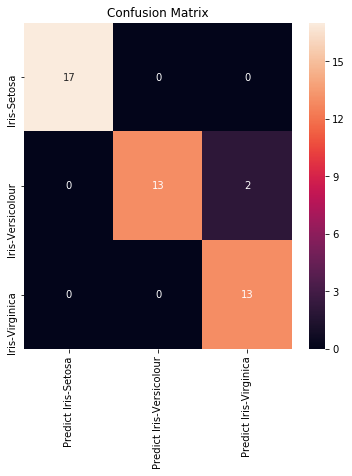

In [17]:
# Logistic Regression Model

Mdl_LogReg = LogisticRegression(solver="liblinear")

model_name = "LogisticRegression"
Param_grid_LogReg =  {'penalty': ['l1','l2'], 'C': np.linspace(0.1,1.1,10)}

Mdl_train_sc, Score_Accuracy, Score_Recall, Score_Precision = ML_test(Mdl_LogReg,Param_grid_LogReg)

summary = summary.append({'Model' : model_name, 'Training Accuracy' : Mdl_train_sc, 'Test Accuracy Score' : Score_Accuracy,\
                       'Test Recall Score' : Score_Recall, 'Test Precision Score' : Score_Precision}, \
                         ignore_index=True)

Training score is: 0.9524
Test Mean score is: 0.9778
Model Accuracy Score: 97.78%
Model Recall Score: 97.78%
Model Precision Score: 97.78%
                  precision    recall  f1-score   support

     Iris-Setosa       1.00      1.00      1.00        17
Iris-Versicolour       1.00      0.93      0.97        15
  Iris-Virginica       0.93      1.00      0.96        13

        accuracy                           0.98        45
       macro avg       0.98      0.98      0.98        45
    weighted avg       0.98      0.98      0.98        45



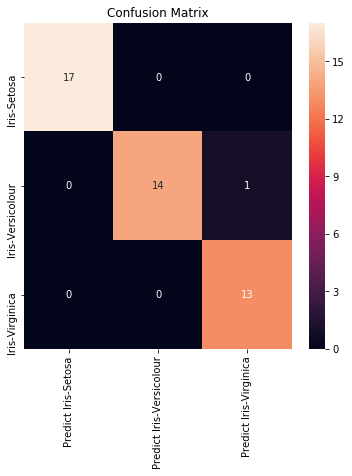

In [18]:
# Gaussian Naive Bayes Model

Mdl = GaussianNB()

model_name = "GaussianNB"

Mdl_train_sc, Score_Accuracy, Score_Recall, Score_Precision = ML_test(Mdl,Param_grid={})

summary = summary.append({'Model' : model_name, 'Training Accuracy' : Mdl_train_sc, 'Test Accuracy Score' : Score_Accuracy,\
                       'Test Recall Score' : Score_Recall, 'Test Precision Score' : Score_Precision}, \
                         ignore_index=True)

Best fit parameter is: {'metric': 'euclidean', 'n_neighbors': 4}
Training score is: 0.943
Test Mean score is: 0.9777777777777777
Model Accuracy Score: 97.78%
Model Recall Score: 97.78%
Model Precision Score: 97.78%
                  precision    recall  f1-score   support

     Iris-Setosa       1.00      1.00      1.00        17
Iris-Versicolour       0.94      1.00      0.97        15
  Iris-Virginica       1.00      0.92      0.96        13

        accuracy                           0.98        45
       macro avg       0.98      0.97      0.98        45
    weighted avg       0.98      0.98      0.98        45



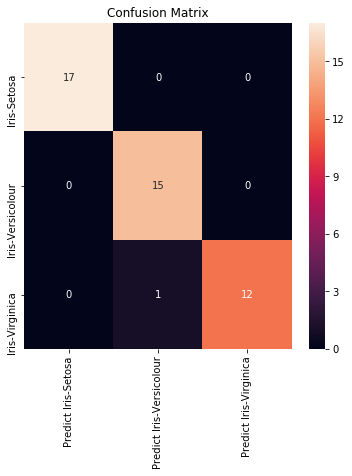

In [19]:
# K Neighbours Classifier Model

Mdl = KNeighborsClassifier()

model_name = "k-Nearest Neighbours"
Param_grid_kNeigh =  {'n_neighbors': list(np.arange(3,8)), 'metric': ['euclidean','manhattan','chebyshev','minkowski']}

Mdl_train_sc, Score_Accuracy, Score_Recall, Score_Precision = ML_test(Mdl,Param_grid_kNeigh)

summary = summary.append({'Model' : model_name, 'Training Accuracy' : Mdl_train_sc, 'Test Accuracy Score' : Score_Accuracy,\
                       'Test Recall Score' : Score_Recall, 'Test Precision Score' : Score_Precision}, \
                         ignore_index=True)

Best fit parameter is: {'C': 0.3222222222222222, 'kernel': 'linear'}
Training score is: 0.9175757575757575
Test Mean score is: 0.9555555555555556
Model Accuracy Score: 95.56%
Model Recall Score: 95.56%
Model Precision Score: 95.56%
                  precision    recall  f1-score   support

     Iris-Setosa       1.00      1.00      1.00        17
Iris-Versicolour       0.93      0.93      0.93        15
  Iris-Virginica       0.92      0.92      0.92        13

        accuracy                           0.96        45
       macro avg       0.95      0.95      0.95        45
    weighted avg       0.96      0.96      0.96        45



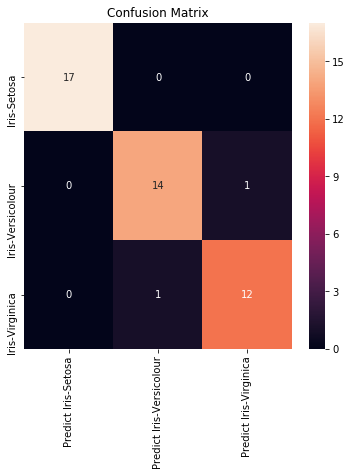

In [20]:
# Support Vector Machine Model

Mdl = SVC(probability=True)

model_name = "Support Vector Machine"
Param_grid_SVC =  {'C': np.linspace(0.1,1.1,10), 'kernel': ['linear','poly','rbf',]}

Mdl_train_sc, Score_Accuracy, Score_Recall, Score_Precision = ML_test(Mdl,Param_grid_SVC)

summary = summary.append({'Model' : model_name, 'Training Accuracy' : Mdl_train_sc, 'Test Accuracy Score' : Score_Accuracy,\
                       'Test Recall Score' : Score_Recall, 'Test Precision Score' : Score_Precision}, \
                         ignore_index=True)

Best fit parameter is: {'criterion': 'gini', 'max_depth': 3, 'min_impurity_decrease': 0.0001}
Training score is: 0.921242424242424
Test Mean score is: 0.9555555555555556
Model Accuracy Score: 95.56%
Model Recall Score: 95.56%
Model Precision Score: 95.56%
                  precision    recall  f1-score   support

     Iris-Setosa       1.00      1.00      1.00        17
Iris-Versicolour       0.93      0.93      0.93        15
  Iris-Virginica       0.92      0.92      0.92        13

        accuracy                           0.96        45
       macro avg       0.95      0.95      0.95        45
    weighted avg       0.96      0.96      0.96        45



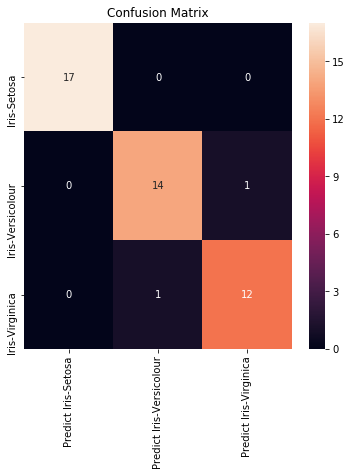

In [21]:
# Decision Tree Model

Mdl = DecisionTreeClassifier(random_state=1)

model_name = "DecisionTreeClassifier"
Param_grid_dt = {'criterion':['gini','entropy'],'max_depth': [3, 4, 5, 6, 7, 8],
             'min_impurity_decrease': [0.0001, 0.0003, 0.0005, 0.0007, 0.009]}

Mdl_train_sc, Score_Accuracy, Score_Recall, Score_Precision = ML_test(Mdl,Param_grid_dt)

summary = summary.append({'Model' : model_name, 'Training Accuracy' : Mdl_train_sc, 'Test Accuracy Score' : Score_Accuracy,\
                       'Test Recall Score' : Score_Recall, 'Test Precision Score' : Score_Precision}, \
                         ignore_index=True)

Best fit parameter is: {'criterion': 'gini', 'max_depth': 3, 'min_impurity_decrease': 0.0001}
Training score is: 0.9325303030303032
Test Mean score is: 0.9555555555555556
Model Accuracy Score: 95.56%
Model Recall Score: 95.56%
Model Precision Score: 95.56%
                  precision    recall  f1-score   support

     Iris-Setosa       1.00      1.00      1.00        17
Iris-Versicolour       0.93      0.93      0.93        15
  Iris-Virginica       0.92      0.92      0.92        13

        accuracy                           0.96        45
       macro avg       0.95      0.95      0.95        45
    weighted avg       0.96      0.96      0.96        45



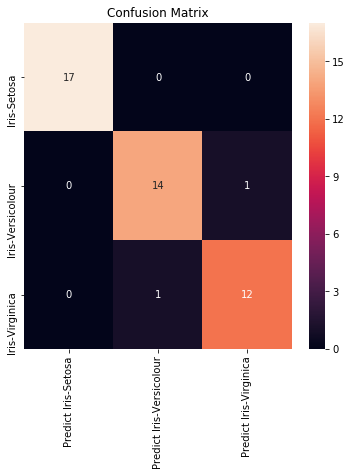

In [22]:
# Random Forest Model

Mdl = RandomForestClassifier(random_state=1,n_estimators=100)

model_name = "RandomForestClassifier"
Param_grid_rf = {'criterion':['gini','entropy'],'max_depth': [3, 4, 5, 6, 7, 8],
             'min_impurity_decrease': [0.0001, 0.0003, 0.0005, 0.0007, 0.009]}

Mdl_train_sc, Score_Accuracy, Score_Recall, Score_Precision = ML_test(Mdl,Param_grid_rf)

summary = summary.append({'Model' : model_name, 'Training Accuracy' : Mdl_train_sc, 'Test Accuracy Score' : Score_Accuracy,\
                       'Test Recall Score' : Score_Recall, 'Test Precision Score' : Score_Precision}, \
                         ignore_index=True)

Best fit parameter is: {'max_samples': 0.1}
Training score is: 0.931
Test Mean score is: 0.9555555555555556
Model Accuracy Score: 95.56%
Model Recall Score: 95.56%
Model Precision Score: 95.56%
                  precision    recall  f1-score   support

     Iris-Setosa       1.00      1.00      1.00        17
Iris-Versicolour       0.93      0.93      0.93        15
  Iris-Virginica       0.92      0.92      0.92        13

        accuracy                           0.96        45
       macro avg       0.95      0.95      0.95        45
    weighted avg       0.96      0.96      0.96        45



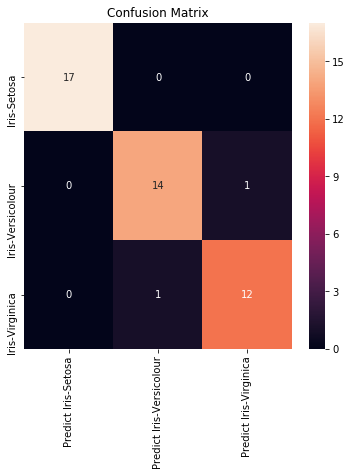

In [23]:
# Bagging Classifier

Mdl = BaggingClassifier(n_estimators=100, bootstrap=True)

model_name = "BaggingClassifier"
Param_grid_bc = {'max_samples': list(np.arange(0.1,1.1,0.1))}

Mdl_train_sc, Score_Accuracy, Score_Recall, Score_Precision = ML_test(Mdl,Param_grid_bc)

summary = summary.append({'Model' : model_name, 'Training Accuracy' : Mdl_train_sc, 'Test Accuracy Score' : Score_Accuracy,\
                       'Test Recall Score' : Score_Recall, 'Test Precision Score' : Score_Precision}, \
                         ignore_index=True)

Best fit parameter is: {'learning_rate': 0.1}
Training score is: 0.9025454545454548
Test Mean score is: 0.9333333333333333
Model Accuracy Score: 93.33%
Model Recall Score: 93.33%
Model Precision Score: 93.33%
                  precision    recall  f1-score   support

     Iris-Setosa       1.00      1.00      1.00        17
Iris-Versicolour       0.88      0.93      0.90        15
  Iris-Virginica       0.92      0.85      0.88        13

        accuracy                           0.93        45
       macro avg       0.93      0.93      0.93        45
    weighted avg       0.93      0.93      0.93        45



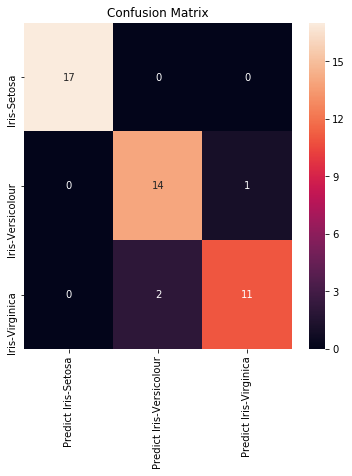

In [24]:
# AdaBoost Classifier

Mdl = AdaBoostClassifier( n_estimators= 100)

model_name = "AdaBoostClassifier"
Param_grid_abc = {'learning_rate': list(np.arange(0.1,1.1,0.1))}

Mdl_train_sc, Score_Accuracy, Score_Recall, Score_Precision = ML_test(Mdl,Param_grid_abc)

summary = summary.append({'Model' : model_name, 'Training Accuracy' : Mdl_train_sc, 'Test Accuracy Score' : Score_Accuracy,\
                       'Test Recall Score' : Score_Recall, 'Test Precision Score' : Score_Precision}, \
                         ignore_index=True)

Best fit parameter is: {'max_depth': 3, 'min_impurity_decrease': 0.009}
Training score is: 0.8994848484848486
Test Mean score is: 0.9333333333333333
Model Accuracy Score: 93.33%
Model Recall Score: 93.33%
Model Precision Score: 93.33%
                  precision    recall  f1-score   support

     Iris-Setosa       1.00      1.00      1.00        17
Iris-Versicolour       0.93      0.87      0.90        15
  Iris-Virginica       0.86      0.92      0.89        13

        accuracy                           0.93        45
       macro avg       0.93      0.93      0.93        45
    weighted avg       0.93      0.93      0.93        45



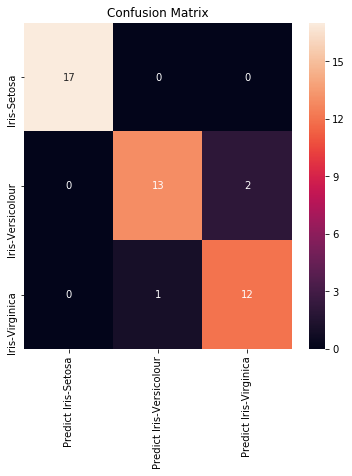

In [25]:
# GradientBoosting Classifier

Mdl = GradientBoostingClassifier(n_estimators= 100, learning_rate=0.1)

model_name = "GradientBoostingClassifier"
Param_grid_gbc = {'max_depth': [3, 4, 5, 6, 7, 8],'min_impurity_decrease': [0.0001, 0.0003, 0.0005, 0.0007, 0.009]}

Mdl_train_sc, Score_Accuracy, Score_Recall, Score_Precision = ML_test(Mdl,Param_grid_gbc)

summary = summary.append({'Model' : model_name, 'Training Accuracy' : Mdl_train_sc, 'Test Accuracy Score' : Score_Accuracy,\
                       'Test Recall Score' : Score_Recall, 'Test Precision Score' : Score_Precision}, \
                         ignore_index=True)

## Comparative Analysis

In [26]:
summary

,Model,Training Accuracy,Test Accuracy Score,Test Recall Score,Test Precision Score
0,LogisticRegression,83.57%,95.56%,95.56%,95.56%
1,GaussianNB,95.24%,97.78%,97.78%,97.78%
2,k-Nearest Neighbours,94.30%,97.78%,97.78%,97.78%
3,Support Vector Machine,91.76%,95.56%,95.56%,95.56%
4,DecisionTreeClassifier,92.12%,95.56%,95.56%,95.56%
5,RandomForestClassifier,93.25%,95.56%,95.56%,95.56%
6,BaggingClassifier,93.10%,95.56%,95.56%,95.56%
7,AdaBoostClassifier,90.25%,93.33%,93.33%,93.33%
8,GradientBoostingClassifier,89.95%,93.33%,93.33%,93.33%


**Metrics**
<br>Accuracy: (TP+TN)/All
<br>Recall: TP/(TP+FN)
<br>Precision: TP/(TP+FP)
<br>Specificity: TN/(TN+FP)

From each of the classification reports and the above summary table, it would seem that all the models have >90% accuracy. The most suitable models would be either the GaussianNB or the k-Nearest Neighbours models as they have the best accuracy, recall and precision score overall.
Depending on which iris is of particular interest, if accuracy of Iris-Versicolour is more important, select GaussianNB, if accuracy of Iris-Virginica s more important, select k-Nearest Neighbours models. Either way is fine.

## Conclusion

From the above, I first analysed the data, and from there proceeded to train Machine Learning algorithms on it. From the results, it would appear that the most suitable models with the best overall results are either the Gaussian Naive Bayes or the k-Nearest Neighbours models.